<h1>Reading data using pandas</h1>

<h1> Pandas</h1>

Pandas use DataFrames, they are two-dimensional data structures.
They have columns, typically labeled with variables names
They also have rows that also have labels, known as index in pandas
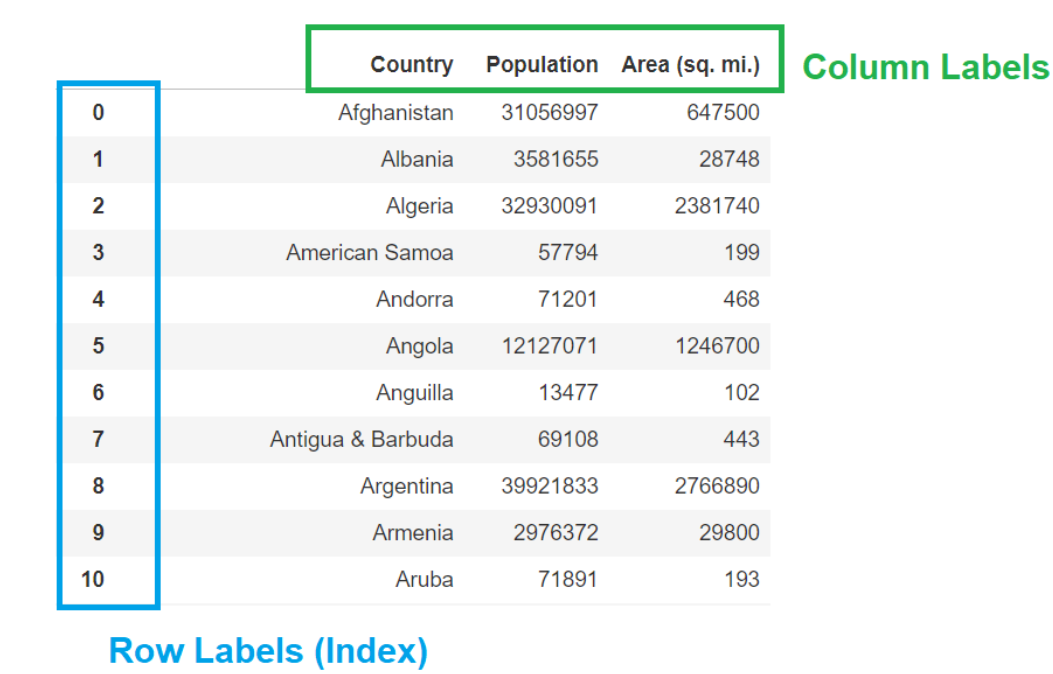

The default index is the row number, but we can specify a column as the index, and many types of data can be used.

Pandas handles many data formats as source data.


<hr>
<h1>Flat Files</h1>

- Simple and easy to produce.
- In flat files, the data is stored as plain text(no formatting)
- Each line in the file represents a row, with column values separated by a delimiter
- To load flat files we can use read_csv() no matter the delimiter.
- We can indicate to the function our delimiter with the parameter: sep='separator'

In [5]:
import pandas as pd

tabSepparatedFile = pd.read_csv('Tab.tsv', sep='\t')#If we don't add the sep parameter, pandas will assume we are using the comma as delimiter
print(tabSepparatedFile)

                         ID,Name,LastName,Email
0  1,José Eduardo,Tejeda León,jtejeda@gmail.com


<h1>Modifying flat file imports</h1>

We can limit the amount of data imported and how to make that data easier to work with by naming columns

To examine the content of a DataFrame, we can use the shape attribute and it will output a tuple: (rows, columns)

we can limit:

1. Columns
    - Choose columns to load with the usecols keyword argument: It accepts a list of column numbers or names, or a function to filter column names.
    

In [4]:
colNums = [0, 1]
ColNames = ['ID', 'Name']
filterColNums = pd.read_csv('Tab.tsv', usecols=colNums)

print(filterColNums)

filterColNames = pd.read_csv('Tab.tsv', usecols=ColNames)
print(filterColNames)

           Name              Email
0  José Eduardo  jtejeda@gmail.com


2. Rows:
    - with nrows keyword argument: It receives the maximum number of rows that we want.
    - We can also usde skiprows which accepts a list of row numbers, a number of rows or a function to filter rows
        - If we use the numer, it will skip the qty that we specify from row 0 until qty is reached.
        - If we use the list, it will skip the rows indicated
    - Set header=None so pandas knows there are no column names.

In [17]:
skipRows = pd.read_csv('Tab.tsv', nrows=2, sep='\t', skiprows=[1], header=None)
print(skipRows.head(1))

                               0
0  ID  Name    LastName    Email


<h1>Assigning Column Names</h1>

- Supply column names by passing a list to the names argument
    - The list must have a name for every column in the data
- If we need to rename a few columns we have to do it after the import

In [38]:
columnNames = pd.read_csv('Tab.csv', nrows=2, skiprows=1, header=None, names=['Id', 'Name', 'Surname', 'Email Address'])
print(columnNames['Name'])

0    José Eduardo
1              Ed
Name: Name, dtype: object


<b>There is a saying that rows are cheap, but columns are expensive</b>

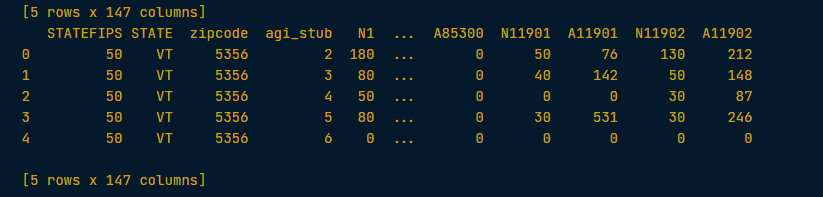

<h1>Handling errors and missing data</h1>

Common importing issues:

- Incorrect column data types: 

    Whenn importing data, Pandas infers each columns data type, we can use dtype argument to specify column data types, it takes a dictionary where each key is a column name and each value is the data type for that column. If we don't include a column in this         dictionary, Pandas will infer the data type.
    <b>Non-standard data types must be passed in quotations.</b> 

    data.dtypes is an attribute of a DataFrame that we can use to see the columns data type mapping
- Missing values:
    Pandas automatically recognizes some values like N/A or null as missing data. We can also specify more syntaxes to represent missing data, in order to do so, we can use the na_values argument to set custom missing values. We can send a single value, list or a dictionary of columns and possible values.

    taxData = pd.read_csv("path, na_values={'zipcode': 0}) 
    <b>We are indicating Pandas that in zipcode column we represented missing values as 0</b>

- Records that pandas cannot read

    For values lines that pandas just can't parse. We can handle this situations with the next two arguments:
        Both take a boolean values
    1. error_bad_lines: Setting it to False makes pandas skip the bad lines and load the rest of the data, otherwise it will throw an error if it can't parse a line.
    2. warn_bad_lines: It tells pandas whether to display messages when unparseable lines are skipped. If is set to True, it will display all the lines that were skipped during the parsing.




In [39]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'Email': 'category',
			  'ID': str}

# Load csv using dtype to set correct data types
data = pd.read_csv("Tab.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())

ID            object
Name          object
LastName      object
Email       category
dtype: object


In [49]:
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("Tab copy.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines = True)
  #A note about this exercise: the exercise console doesn't usually display warnings, so this exercise uses a slightly modified version of read_csv() that prints warnings, just like you would see if you ran the code in a local environment.
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

   IDs          Name     LastName               Email
0    1  José Eduardo  Tejeda León  sjtejeda@gmail.com


C:\Users\Eduardo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Eduardo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3: expected 4 fields, saw 5\n'
